In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU,Dropout
from tensorflow.python.keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

In [2]:
Stock_Data = pd.read_csv('upload_DJIA_table.csv', na_values=[""," "])

In [3]:
Stock_Data.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [4]:
Stock_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [6]:
Stock_Predictors = list(Stock_Data)[1:7]

In [7]:
Stock_Predictors

['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [8]:
Stock_For_Training = Stock_Data[Stock_Predictors].astype(float)

In [9]:
Stock_For_Training.head(5)

,Open,High,Low,Close,Volume,Adj Close
0,17924.240234,18002.380859,17916.910156,17949.369141,82160000.0,17949.369141
1,17712.759766,17930.609375,17711.800781,17929.990234,133030000.0,17929.990234
2,17456.019531,17704.509766,17456.019531,17694.679688,106380000.0,17694.679688
3,17190.509766,17409.720703,17190.509766,17409.720703,112190000.0,17409.720703
4,17355.210938,17355.210938,17063.080078,17140.240234,138740000.0,17140.240234


In [11]:
Dt = []
for i in Stock_Dates:
    Dt.append(datetime.month(Stock_Dates[i]))

KeyError: Timestamp('2016-07-01 00:00:00')

In [14]:
Stock_For_Training['Date'] = 

In [17]:
Stock_For_Training['Date'] = Stock_For_Training['Date'].astype(float)

TypeError: float() argument must be a string or a number, not 'datetime.date'

In [15]:
decompose_result = seasonal_decompose(Stock_For_Training, model="multiplicative")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()

TypeError: float() argument must be a string or a number, not 'datetime.date'

In [10]:
Stock_For_Training.shape

(1989, 6)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
Scaler =StandardScaler()
Scaler_Fit = Scaler.fit(Stock_For_Training)
Scaled_Stock_Data = Scaler_Fit.transform(Stock_For_Training)

In [13]:
n_Feature = 1 #number of dayes i want to predict
Time_Stamp = 7 #Number of days which will be in observation to predict 8th day's Prediction
Train_X = []
Train_y = []

In [14]:
for i in range(Time_Stamp, len(Scaled_Stock_Data)-n_Feature+1):
    Train_X.append(Scaled_Stock_Data[i - Time_Stamp:i , 0:Stock_For_Training.shape[1]])
    Train_y.append(Scaled_Stock_Data[i + n_Feature -1: i+n_Feature,0])

In [15]:
Train_X, Train_y = np.array(Train_X), np.array(Train_y)

In [16]:
print(Train_X.shape)
print(Train_y.shape)

(1982, 7, 6)
(1982, 1)


In [17]:
Train_y[0:4]

array([[1.3917473 ],
       [1.39004806],
       [1.36126168],
       [1.36017029]])

In [18]:
Train_X.shape[1]

7

In [19]:
#Creating Model
Model = Sequential()
Model.add(LSTM(64,activation = 'relu', input_shape =(7,6), return_sequences = True ))
Model.add(LSTM(32, activation = 'relu', return_sequences=False))
Model.add(Dropout(0.3))
Model.add(Dense(1))
Model.compile(optimizer='adam', loss='mse')

In [20]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 64)             18176     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [21]:
History = Model.fit(Train_X, Train_y, epochs=10, batch_size = 16, validation_split=0.1, verbose = 1)

Epoch 1/10
112/112 [==============================] - 6s 14ms/step - loss: 0.1562 - val_loss: 0.0858
Epoch 2/10
112/112 [==============================] - 1s 8ms/step - loss: 0.0420 - val_loss: 0.0153
Epoch 3/10
112/112 [==============================] - 1s 7ms/step - loss: 0.0375 - val_loss: 0.0438
Epoch 4/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0371 - val_loss: 0.0804
Epoch 5/10
112/112 [==============================] - 1s 7ms/step - loss: 0.0369 - val_loss: 0.0305
Epoch 6/10
112/112 [==============================] - 1s 7ms/step - loss: 0.0349 - val_loss: 0.0192
Epoch 7/10
112/112 [==============================] - 1s 7ms/step - loss: 0.0351 - val_loss: 0.0986
Epoch 8/10
112/112 [==============================] - 1s 7ms/step - loss: 0.0361 - val_loss: 0.0973
Epoch 9/10
112/112 [==============================] - 1s 7ms/step - loss: 0.0329 - val_loss: 0.1453
Epoch 10/10
112/112 [==============================] - 1s 7ms/step - loss: 0.0360 - val_loss: 0.059

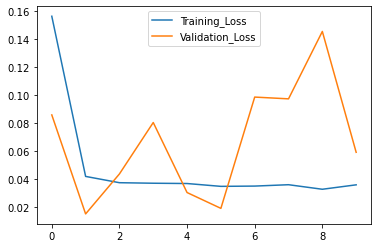

In [22]:
plt.plot(History.history['loss'], label = 'Training_Loss')
plt.plot(History.history['val_loss'], label = 'Validation_Loss')
plt.legend()

In [23]:
Stock_Dates = Stock_Dates.sort_values(ascending =True)

In [24]:
#Forcasting....
n_Month = 30
Forcast_Dates = pd.date_range(list(Stock_Dates)[-1], periods=n_Month, freq='1d').tolist()

In [31]:
Forcast = Model.predict(Train_X[-n_Month:])

In [32]:
Forcast.shape

(30, 1)

In [34]:
Forcast_Copies = np.repeat(Forcast,Stock_For_Training.shape[1],axis=-1)

In [35]:
Forecast_Inverse = Scaler.inverse_transform(Forcast_Copies)[:,0]

In [29]:
Forecast_Periods = []
for i in Forcast_Dates:
    Forecast_Periods.append(i.date())

In [37]:
Forecast_Data = pd.DataFrame({'Date':np.array(Forecast_Periods), 'Prediction':Forecast_Inverse})
Forecast_Data['Date']=pd.to_datetime(Forecast_Data['Date'])

In [ ]:
Forecast_Data.head(5)

In [ ]:
Orig_Data = Stock_Data[['Date','Open']]
Orig_Data['Date'] = pd.to_datetime(Orig_Data['Date'])

In [ ]:
plt.plot(Orig_Data['Date'], Orig_Data['Open'])
plt.plot(Forecast_Data['Date'], Forecast_Data['Prediction'])